In [43]:
# Install the modules
# pyreadr, numpy, pandas, matplotlib, seaborn, scipy

In [44]:
import pyreadr # For reading the r data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
data_file = '../5v_cleandf.rdata'
r_format = pyreadr.read_r(data_file) # this took a very long time for me

In [4]:
r_format.keys()

odict_keys(['df'])

In [5]:
df = r_format['df']
df.head().T

,0,1,2,3,4
dep_name,B,B,B,A,A
esi,4,4,2,2,3
age,40,66,66,66,84
gender,Male,Male,Male,Male,Female
ethnicity,Hispanic or Latino,Hispanic or Latino,Hispanic or Latino,Hispanic or Latino,Hispanic or Latino
...,...,...,...,...,...
cc_woundcheck,0,0,0,0,0
cc_woundinfection,0,0,0,0,0
cc_woundre-evaluation,0,0,0,0,0
cc_wristinjury,0,0,0,0,0


In [6]:
for col in df.columns:
    print(col)

dep_name
esi
age
gender
ethnicity
race
lang
religion
maritalstatus
employstatus
insurance_status
disposition
arrivalmode
arrivalmonth
arrivalday
arrivalhour_bin
previousdispo
2ndarymalig
abdomhernia
abdomnlpain
abortcompl
acqfootdef
acrenlfail
acutecvd
acutemi
acutphanm
adjustmentdisorders
adltrespfl
alcoholrelateddisorders
allergy
amniosdx
analrectal
anemia
aneurysm
anxietydisorders
appendicitis
artembolism
asppneumon
asthma
attentiondeficitconductdisruptivebeha
backproblem
biliarydx
birthasphyx
birthtrauma
bladdercncr
blindness
bnignutneo
bonectcncr
bph
brainnscan
breastcancr
breastdx
brnchlngca
bronchitis
burns
cardiaarrst
cardiacanom
carditis
cataract
cervixcancr
chestpain
chfnonhp
chrkidneydisease
coaghemrdx
coloncancer
comabrndmg
complicdevi
complicproc
conduction
contraceptiv
copd
coronathero
crushinjury
cysticfibro
deliriumdementiaamnesticothercognitiv
developmentaldisorders
diabmelnoc
diabmelwcm
disordersusuallydiagnosedininfancych
diverticulos
dizziness
dminpreg
dysrhythmia
e

Potentially relevant columns here are `gender`, `ethnicity`, `race`, `employstatus`, `insurance_status`, `disposition`. The majority of the columns are categorical results of whether a patient has a condition or not, however, I haven't looked through all 972 columns.

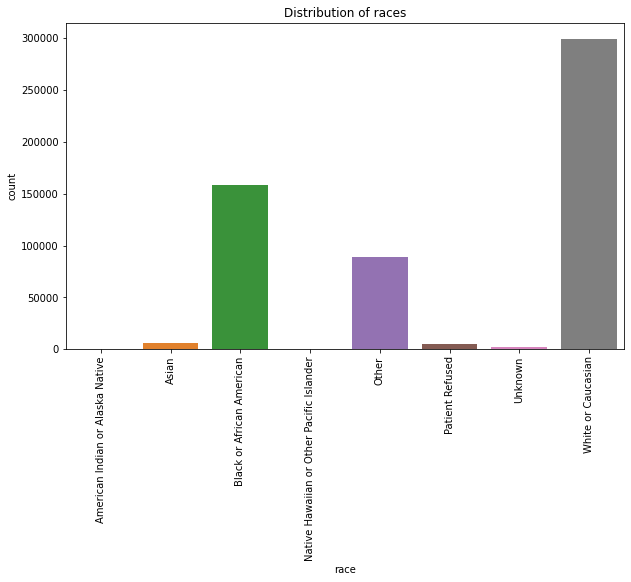

In [26]:
fig = plt.figure(figsize=(10, 6))
sns.countplot(x='race', data=df)
plt.title('Distribution of races')
plt.xticks(rotation=90)
plt.show()

In [32]:
print('Race Distribution of dataset')
print('American Indian or Alaska Native:',
      df[df['race'] == 'American Indian or Alaska Native']['race'].count(),
      df[df['race'] == 'American Indian or Alaska Native']['race'].count() / df.shape[0]
)
print('Asian:',
      df[df['race'] == 'Asian']['race'].count(),
      df[df['race'] == 'Asian']['race'].count() / df.shape[0]
)
print('Black or African American:',
      df[df['race'] == 'Black or African American']['race'].count(),
      df[df['race'] == 'Black or African American']['race'].count() / df.shape[0]
)
print('Native Hawaiian or Other Pacific Islander:',
      df[df['race'] == 'Native Hawaiian or Other Pacific Islander']['race'].count(),
      df[df['race'] == 'Native Hawaiian or Other Pacific Islander']['race'].count() / df.shape[0]
)
print('Other:',
      df[df['race'] == 'Other']['race'].count(),
      df[df['race'] == 'Other']['race'].count() / df.shape[0]
)
print('Patient Refused:',
      df[df['race'] == 'Patient Refused']['race'].count(),
      df[df['race'] == 'Patient Refused']['race'].count() / df.shape[0]
)
print('Unknown:',
      df[df['race'] == 'Unknown']['race'].count(),
      df[df['race'] == 'Unknown']['race'].count() / df.shape[0]
)
print('White or Caucasian:',
      df[df['race'] == 'White or Caucasian']['race'].count(),
      df[df['race'] == 'White or Caucasian']['race'].count() / df.shape[0]
)

Race Distribution of dataset
American Indian or Alaska Native: 515 0.000918845430572753
Asian: 5790 0.010330320471876193
Black or African American: 157884 0.28169124652533695
Native Hawaiian or Other Pacific Islander: 375 0.0006690622067277327
Other: 89359 0.15943127928262257
Patient Refused: 5203 0.009283015097611716
Unknown: 1702 0.003036650335601603
White or Caucasian: 299632 0.5345931923366507


# Insurance

In [11]:
print(list(df['race'].unique()))

['White or Caucasian', 'Native Hawaiian or Other Pacific Islander', 'Other', 'Black or African American', 'Patient Refused', 'Asian', 'Unknown', 'American Indian or Alaska Native', nan]


In [12]:
def pie_chart(insurance_status, data, data2):
    color_palette = {
        'White or Caucasian': 'blue',
        'Black or African American': 'orange',
        'Other': 'green',
        'Asian': 'red',
        'Patient Refused': 'purple',
        'Unknown': 'brown',
        'American Indian or Alaska Native': 'pink',
        'Native Hawaiian or Other Pacific Islander': 'gray',
        np.nan: 'yellow'
    } # set the color palette so that all plots have the same colors for the same race
    fig = plt.figure(figsize=(15, 15))
    
    def pie_subplot(data, row, col, which, title):
        # get the subsection of the dataframe with that particular insurance status
        data_with_insurance_status = data[data['insurance_status'] == insurance_status]
        unique_races = data_with_insurance_status['race'].unique()

        keys_data = []
        for race in unique_races:
            keys_data.append(
                (
                    race,
                    data_with_insurance_status[data_with_insurance_status['race'] == race]['race']
                        .count()
                ) # append a particular race and the number of people with a particular insurance status
            )

        keys_data.sort(key=lambda x: x[1], reverse=True) # sort by the number of people

        keys = [x[0] for x in keys_data]
        values = [x[1] for x in keys_data]

        colors = [color_palette[x] for x in keys]

        # Plot a pie chart
        plt.subplot(row, col, which)
        plt.pie(values, colors=colors)
        plt.legend(keys)
        plt.title(title)

    # data is a comprised of samples of 100 datapoints for each race because there aren't an
    # equal amount of each race --> this is a way to show the real distribution
    pie_subplot(data, 1, 2, 1, insurance_status)
    # data2 is just the whole dataframe
    pie_subplot(data2, 1, 2, 2, insurance_status + " Real")
    
    plt.show()

In [13]:
sample1 = df[df['race'] == 'White or Caucasian'].sample(n=100)
sample2 = df[df['race'] == 'Black or African American'].sample(n=100)
sample3 = df[df['race'] == 'Other'].sample(n=100)
sample4 = df[df['race'] == 'Asian'].sample(n=100)
sample5 = df[df['race'] == 'Patient Refused'].sample(n=100)
sample6 = df[df['race'] == 'Unknown'].sample(n=100)
sample7 = df[df['race'] == 'American Indian or Alaska Native'].sample(n=100)
sample8 = df[df['race'] == 'Native Hawaiian or Other Pacific Islander'].sample(n=100)

# Put the samples together into one dataframe for use
plot_df = pd.concat([sample1, sample2, sample3, sample4, sample5, sample6, sample7, sample8])

## Visualizing Race Distributions of Insurance Types

In [15]:
print(list(df['insurance_status'].unique()))

['Other', 'Commercial', 'Medicare', 'Medicaid', 'Self pay']


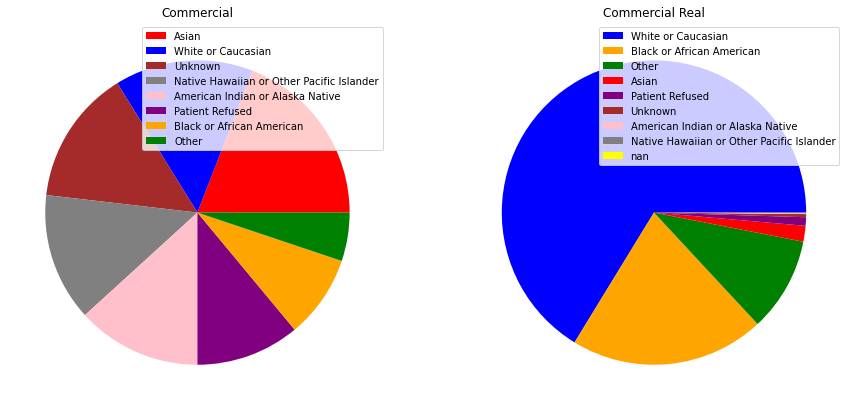

In [14]:
pie_chart('Commercial', plot_df, df)

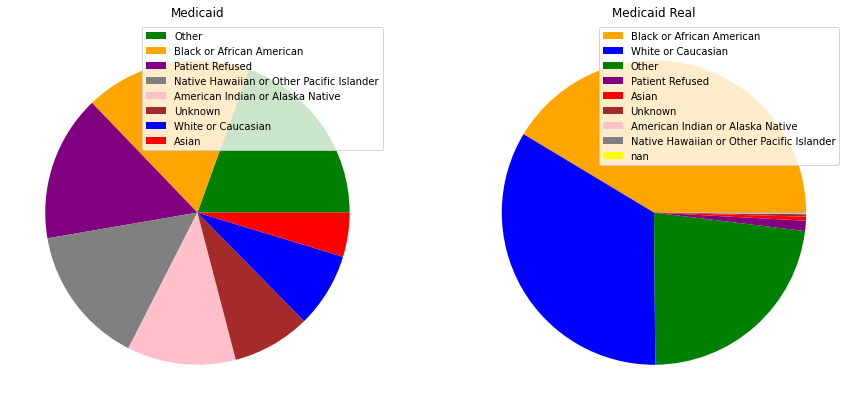

In [16]:
pie_chart('Medicaid', plot_df, df)

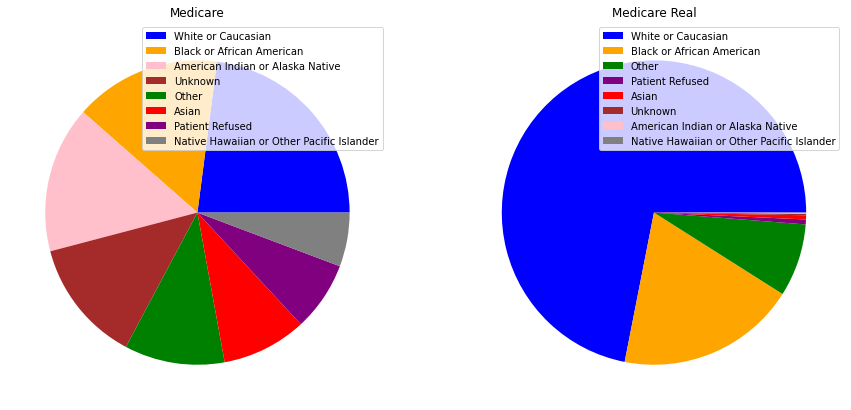

In [17]:
pie_chart('Medicare', plot_df, df)

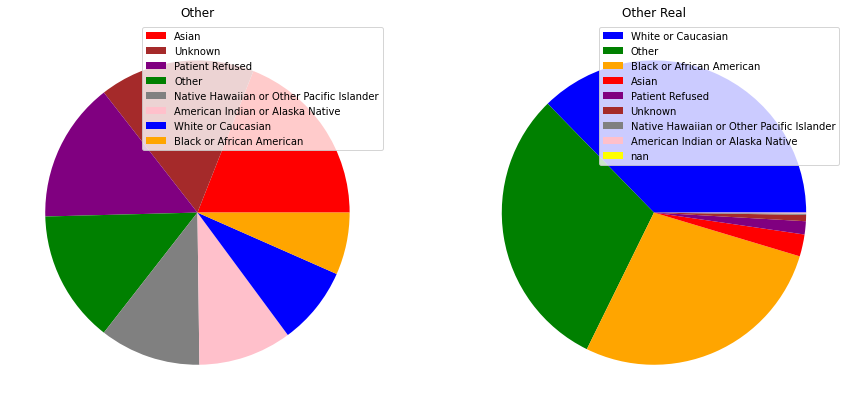

In [18]:
pie_chart('Other', plot_df, df)

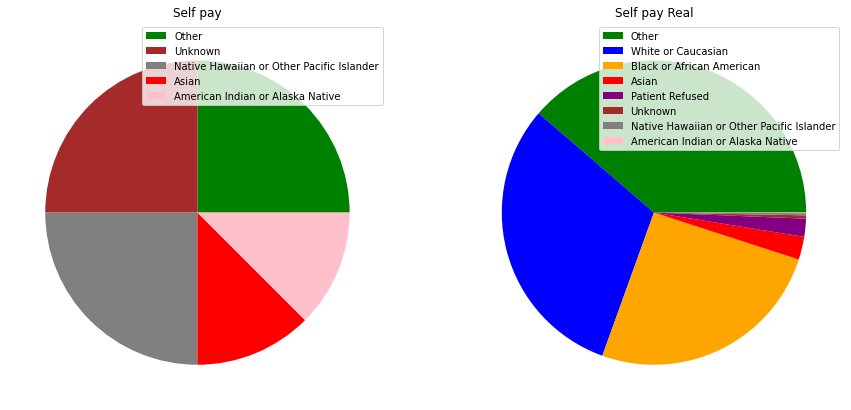

In [19]:
pie_chart('Self pay', plot_df, df)

The only notable thing I noticed was that despite its smaller population, a greater percentage of black people have Medicaid.

# Employment Status

In [34]:
print(list(df['employstatus'].unique()))

['Full Time', 'Not Employed', 'Retired', 'Disabled', 'Part Time', 'Self Employed', 'On Active Military Duty', 'Student - Full Time', 'Unknown', 'Student - Part Time']


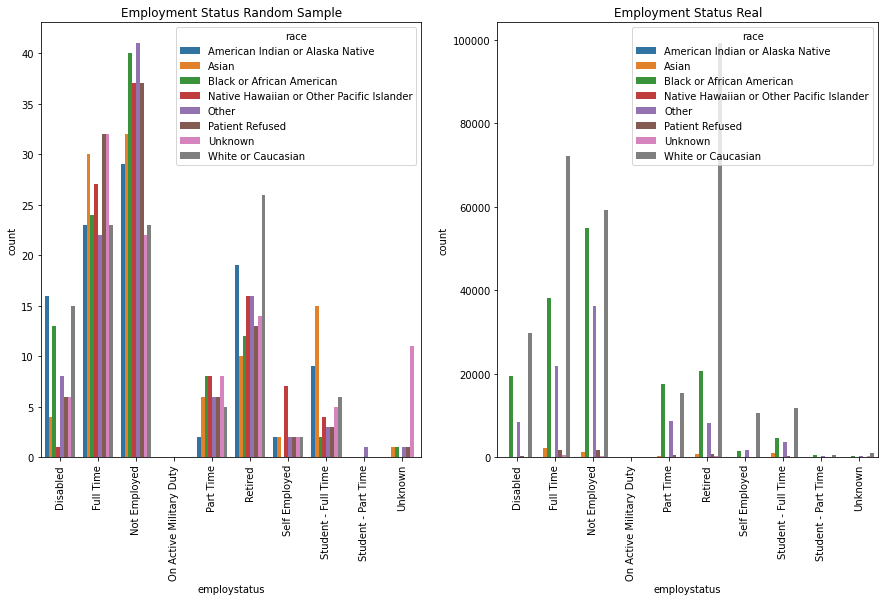

In [35]:
fig = plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
sns.countplot(x='employstatus', data=plot_df, hue='race')
plt.xticks(rotation=90)
plt.title('Employment Status Random Sample')

plt.subplot(1, 2, 2)
sns.countplot(x='employstatus', data=df, hue='race')
plt.xticks(rotation=90)
plt.title('Employment Status Real')

plt.show()

There are no blatant disparities within the employment status.

# Disposition

In [37]:
print(list(df['disposition'].unique()))

['Discharge', 'Admit']


In [38]:
print(list(df['previousdispo'].unique()))

['No previous dispo', 'Discharge', 'Admit', 'Transfer to Another Facility', 'AMA', 'LWBS after Triage', 'Eloped', 'LWBS before Triage', 'Observation', 'Send to L&D']


In [39]:
contingency = pd.crosstab(df['race'], df['previousdispo'])
contingency

previousdispo,AMA,Admit,Discharge,Eloped,LWBS after Triage,LWBS before Triage,No previous dispo,Observation,Send to L&D,Transfer to Another Facility
race,,,,,,,,,,
American Indian or Alaska Native,1,106,243,3,6,2,145,0,1,8
Asian,11,644,1805,2,28,0,3089,0,1,210
Black or African American,870,30079,90887,668,2134,405,31153,97,91,1500
Native Hawaiian or Other Pacific Islander,0,40,166,1,5,1,156,0,0,6
Other,372,13351,48078,283,1055,135,25344,49,63,629
Patient Refused,14,678,2395,7,37,10,2014,0,4,44
Unknown,8,170,580,2,11,3,911,0,0,17
White or Caucasian,1252,72808,118076,586,1495,241,101186,180,48,3760


In [40]:
contigency_pct = pd.crosstab(df['race'], df['previousdispo'], normalize='index')
contigency_pct

previousdispo,AMA,Admit,Discharge,Eloped,LWBS after Triage,LWBS before Triage,No previous dispo,Observation,Send to L&D,Transfer to Another Facility
race,,,,,,,,,,
American Indian or Alaska Native,0.001942,0.205825,0.471845,0.005825,0.011650,0.003883,0.281553,0.000000,0.001942,0.015534
Asian,0.001900,0.111226,0.311744,0.000345,0.004836,0.000000,0.533506,0.000000,0.000173,0.036269
Black or African American,0.005510,0.190513,0.575657,0.004231,0.013516,0.002565,0.197316,0.000614,0.000576,0.009501
Native Hawaiian or Other Pacific Islander,0.000000,0.106667,0.442667,0.002667,0.013333,0.002667,0.416000,0.000000,0.000000,0.016000
Other,0.004163,0.149409,0.538032,0.003167,0.011806,0.001511,0.283620,0.000548,0.000705,0.007039
Patient Refused,0.002691,0.130309,0.460311,0.001345,0.007111,0.001922,0.387084,0.000000,0.000769,0.008457
Unknown,0.004700,0.099882,0.340776,0.001175,0.006463,0.001763,0.535253,0.000000,0.000000,0.009988
White or Caucasian,0.004178,0.242991,0.394070,0.001956,0.004989,0.000804,0.337701,0.000601,0.000160,0.012549


<AxesSubplot:xlabel='previousdispo', ylabel='race'>

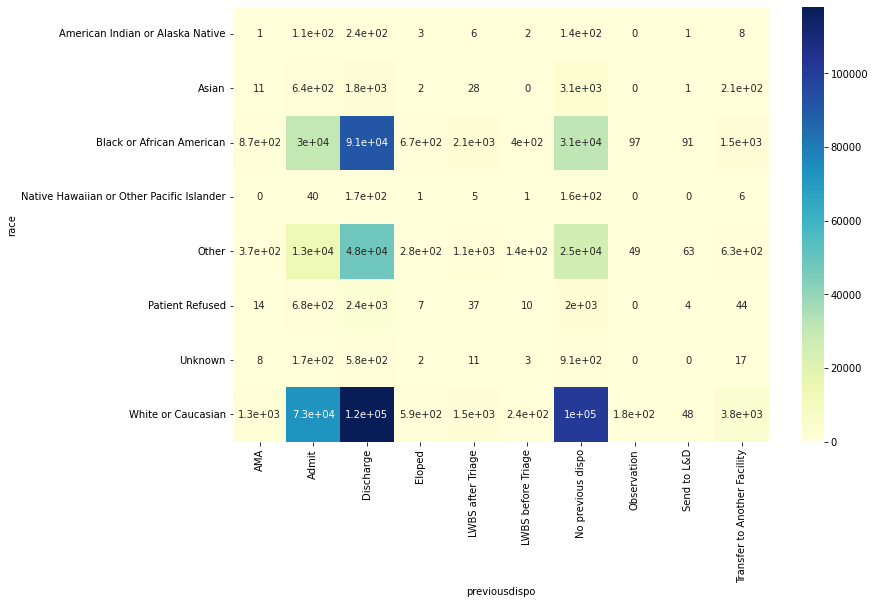

In [42]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [45]:
c, p, dof, expected = chi2_contingency(contingency)
print(p)

0.0


Null hypothesis: There is no correlation between race and disposition
Null hypothesis rejected because a p-value below 0.05 is considered to be statistically significant.
Thus,it is false that there is no corrrelation between race and disposition.